# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a>, son but est de mettre à disposition des consommateurs les données de produits alimentaires. Pour une meilleure compréhension, la description des données est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, il est décidé de développer un outil permettant de rééquilibrer les habitudes alimentaires. Le but est de retranscrire les repas en informations nutritionnelles afin de proposer des menus similaires plus équilibrés, conformes aux Apports Journaliers Recommandés (AJR). Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (régime alimentaire, allergies,..)
5. Proposition de menus conformes aux ANC, aux AJR et habitudes du consommateur.

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook de nettoyage:**
1. Description des données
2. Nettoyage des données
   1. *Suppression des données inexploitables*
   2. *Sélection des produits issus des territoires français*
   3. *Gestion des données par types (colonnes)*
      1. *Traitement des informations produit*
         1. *Sélection des variables pertinentes*
         2. *Nettoyage et mise en forme des données*
      2. *Traitement des valeurs nutritionnelles*
         1. *Gestion des outliers*
3. Imputation des données manquantes (nutriments)
   1. *Imputation de la moyenne globale*
   2. *Imputation de la moyenne par catégorie (pnns_groups_2)*
   3. *Imputation via le KNN-Imputer*
   4. *Imputation du nutrition_grade_fr*
4. *Conclusion*

## **0. Importation des librairies et des données**
---

In [1]:

# Importing python librairies
import numpy as np
import pandas as pd
import random
import sklearn as sl
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from scipy.stats import wilcoxon
import scipy.stats as stats

from wordcloud import WordCloud
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

### Charte graphique

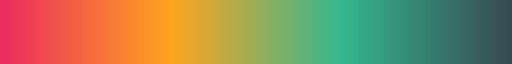

In [4]:
# Define the color
first_color = "#EB2D5F"  # Première couleur
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 100
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

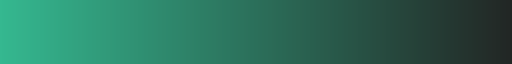

In [5]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.135501472720115, 0.15379014441096242, 0.14603572984787294),
 (0.13607109212590074, 0.15826084112781297, 0.1493323452219286),
 (0.1363559018287936, 0.16049618948623823, 0.1509806529089564),
 (0.13692552123457932, 0.16496688620308878, 0.15427726828301208),
 (0.1372103309374722, 0.16720223456151403, 0.1559255759700399),
 (0.1377799503432579, 0.17167293127836458, 0.15922219134409554),
 (0.13834956974904364, 0.1761436279952151, 0.16251880671815122),
 (0.1386343794519365, 0.17837897635364036, 0.16416711440517903),
 (0.13920399885772222, 0.1828496730704909, 0.16746372977923468),
 (0.13948880856061507, 0.18508502142891617, 0.16911203746626252),
 (0.1400584279664008, 0.18955571814576672, 0.17240865284031817),
 (0.14062804737218654, 0.19402641486261724, 0.17570526821437382),
 (0.1409128570750794, 0.1962617632210425, 0.17735357590140166),
 (0.14148247648086512, 0.20073245993789304, 0.1806501912754573),
 (0.14176728618375797, 0.2029678082963183, 0.18229849896248512),
 (0.1423369055895437, 0.20743850501316885, 0.1855951143365408),
 (0.14290652499532944, 0.21190920173001937, 0.18889172971059645),
 (0.1431913346982223, 0.21414455008844463, 0.19054003739762426),
 (0.14376095410400802, 0.21861524680529518, 0.19383665277167994),
 (0.14404576380690087, 0.22085059516372046, 0.19548496045870775),
 (0.1446153832126866, 0.22532129188057098, 0.1987815758327634),
 (0.14490019291557946, 0.22755664023899624, 0.20042988351979124),
 (0.1454698123213652, 0.2320273369558468, 0.2037264988938469),
 (0.14603943172715092, 0.23649803367269734, 0.20702311426790254),
 (0.14632424143004377, 0.2387333820311226, 0.20867142195493038),
 (0.1468938608358295, 0.24320407874797312, 0.21196803732898603),
 (0.14717867053872236, 0.24543942710639838, 0.21361634501601387),
 (0.1477482899445081, 0.24991012382324893, 0.21691296039006952),
 (0.14831790935029382, 0.2543808205400995, 0.22020957576412517),
 (0.14860271905318667, 0.25661616889852473, 0.221857883451153),
 (0.1491723384589724, 0.26108686561537525, 0.22515449882520866),
 (0.14945714816186526, 0.2633222139738005, 0.2268028065122365),
 (0.150026767567651, 0.26779291069065103, 0.23009942188629212),
 (0.1505963869734367, 0.2722636074075016, 0.2333960372603478),
 (0.15088119667632957, 0.27449895576592687, 0.23504434494737564),
 (0.1514508160821153, 0.2789696524827774, 0.23834096032143126),
 (0.15173562578500815, 0.2812050008412027, 0.2399892680084591),
 (0.1523052451907939, 0.2856756975580532, 0.24328588338251478),
 (0.1528748645965796, 0.29014639427490374, 0.2465824987565704),
 (0.15315967429947247, 0.29238174263332906, 0.24823080644359824),
 (0.15372929370525817, 0.2968524393501795, 0.25152742181765386),
 (0.15401410340815105, 0.2990877877086048, 0.2531757295046817),
 (0.15458372281393679, 0.30355848442545535, 0.2564723448787374),
 (0.15486853251682964, 0.3057938327838806, 0.2581206525657652),
 (0.15543815192261537, 0.31026452950073113, 0.2614172679398209),
 (0.15600777132840107, 0.31473522621758165, 0.2647138833138765),
 (0.15629258103129395, 0.31697057457600697, 0.26636219100090436),
 (0.15686220043707966, 0.3214412712928575, 0.26965880637496),
 (0.15714701013997254, 0.32367661965128275, 0.2713071140619878),
 (0.15771662954575827, 0.3281473163681333, 0.2746037294360435),
 (0.15828624895154397, 0.33261801308498384, 0.2779003448100992),
 (0.15857105865443683, 0.33485336144340905, 0.27954865249712696),
 (0.15914067806022256, 0.3393240581602596, 0.28284526787118264),
 (0.15942548776311544, 0.3415594065186849, 0.2844935755582104),
 (0.15999510716890114, 0.3460301032355354, 0.2877901909322661),
 (0.16056472657468687, 0.3505007999523859, 0.2910868063063218),
 (0.16084953627757972, 0.35273614831081124, 0.2927351139933496),
 (0.16141915568336546, 0.35720684502766176, 0.29603172936740524),
 (0.1617039653862583, 0.359442193386087, 0.2976800370544331),
 (0.16227358479204404, 0.3639128901029376, 0.3009766524284887),
 (0.16255839449493692, 0.3661482384613628, 0.302624

In [7]:
# Reverse the order of colours in the palette list
palette_map = list(reversed(palette_map))

## **1. Description des données**
***

In [8]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [9]:
# View random data
df_food.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
165506,0857883002207,http://world-fr.openfoodfacts.org/produit/0857...,usda-ndb-import,1489096932,2017-03-09T22:02:12Z,1489096932,2017-03-09T22:02:12Z,Jelly,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN
163152,0855481005101,http://world-fr.openfoodfacts.org/produit/0855...,usda-ndb-import,1489093694,2017-03-09T21:08:14Z,1489093694,2017-03-09T21:08:14Z,Beef Jerky,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN
264381,4250780301095,http://world-fr.openfoodfacts.org/produit/4250...,date-limite-app,1476351553,2016-10-13T09:39:13Z,1482843420,2016-12-27T12:57:00Z,Mandarin-Orangen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


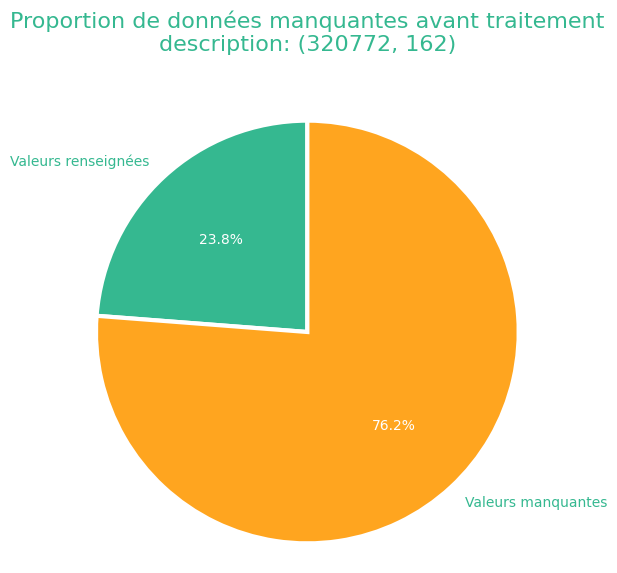

In [10]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Valeurs renseignées", "Valeurs manquantes"]
# Define color code
colors = ["#35B890",'#FFA51F']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de données manquantes avant traitement\ndescription: {df_food.shape}\n",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

In [11]:
# Information on data quality
print("Nb de colonne sans données: {}".format(df_food.columns[df_food.isnull().all()].shape[0]))
print("Nb de lignes sans données : {}".format(df_food.isna().all(axis=1).sum()))
print("Nb de lignes dupliquées : {}".format(df_food.duplicated().sum()))
print("Nb d'identifiant uniques dupliqués' : {}".format(df_food["code"].duplicated().sum()))

Nb de colonne sans données: 16
Nb de lignes sans données : 0
Nb de lignes dupliquées : 0
Nb d'identifiant uniques dupliqués' : 22


## **2. Nettoyage des données**
***

Dans un premier temps, il s'agit de supprimer les variables inutiles et qui ne comportent pas suffisamment d'informations pour être exploitées. Un seuil de 25% de données disponibles est fixé pour la sélection des variables. Afin de promouvoir les produits locaux, seul les produits issus des territoires français seront sélectionnés.

### **1. Suppression des données inexploitables**

Pour commencer, les colonnes n'ayant aucune valeurs sont supprimées.

In [12]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

Puis, l'analyse du taux de remplissage par variables permet de visualiser la qualité du jeu de données et d'observer les colonnes concernées par le seuil de 25% établis précédemment.

In [13]:
# Instantiation of the percentage of missing values for each column
null_value_rates = df_food.notnull().mean()*100
df_null_values = pd.DataFrame({"column_name":df_food.columns,"null_value_rates":null_value_rates.values})
df_null_values = df_null_values.sort_values(by="null_value_rates",ascending=False)

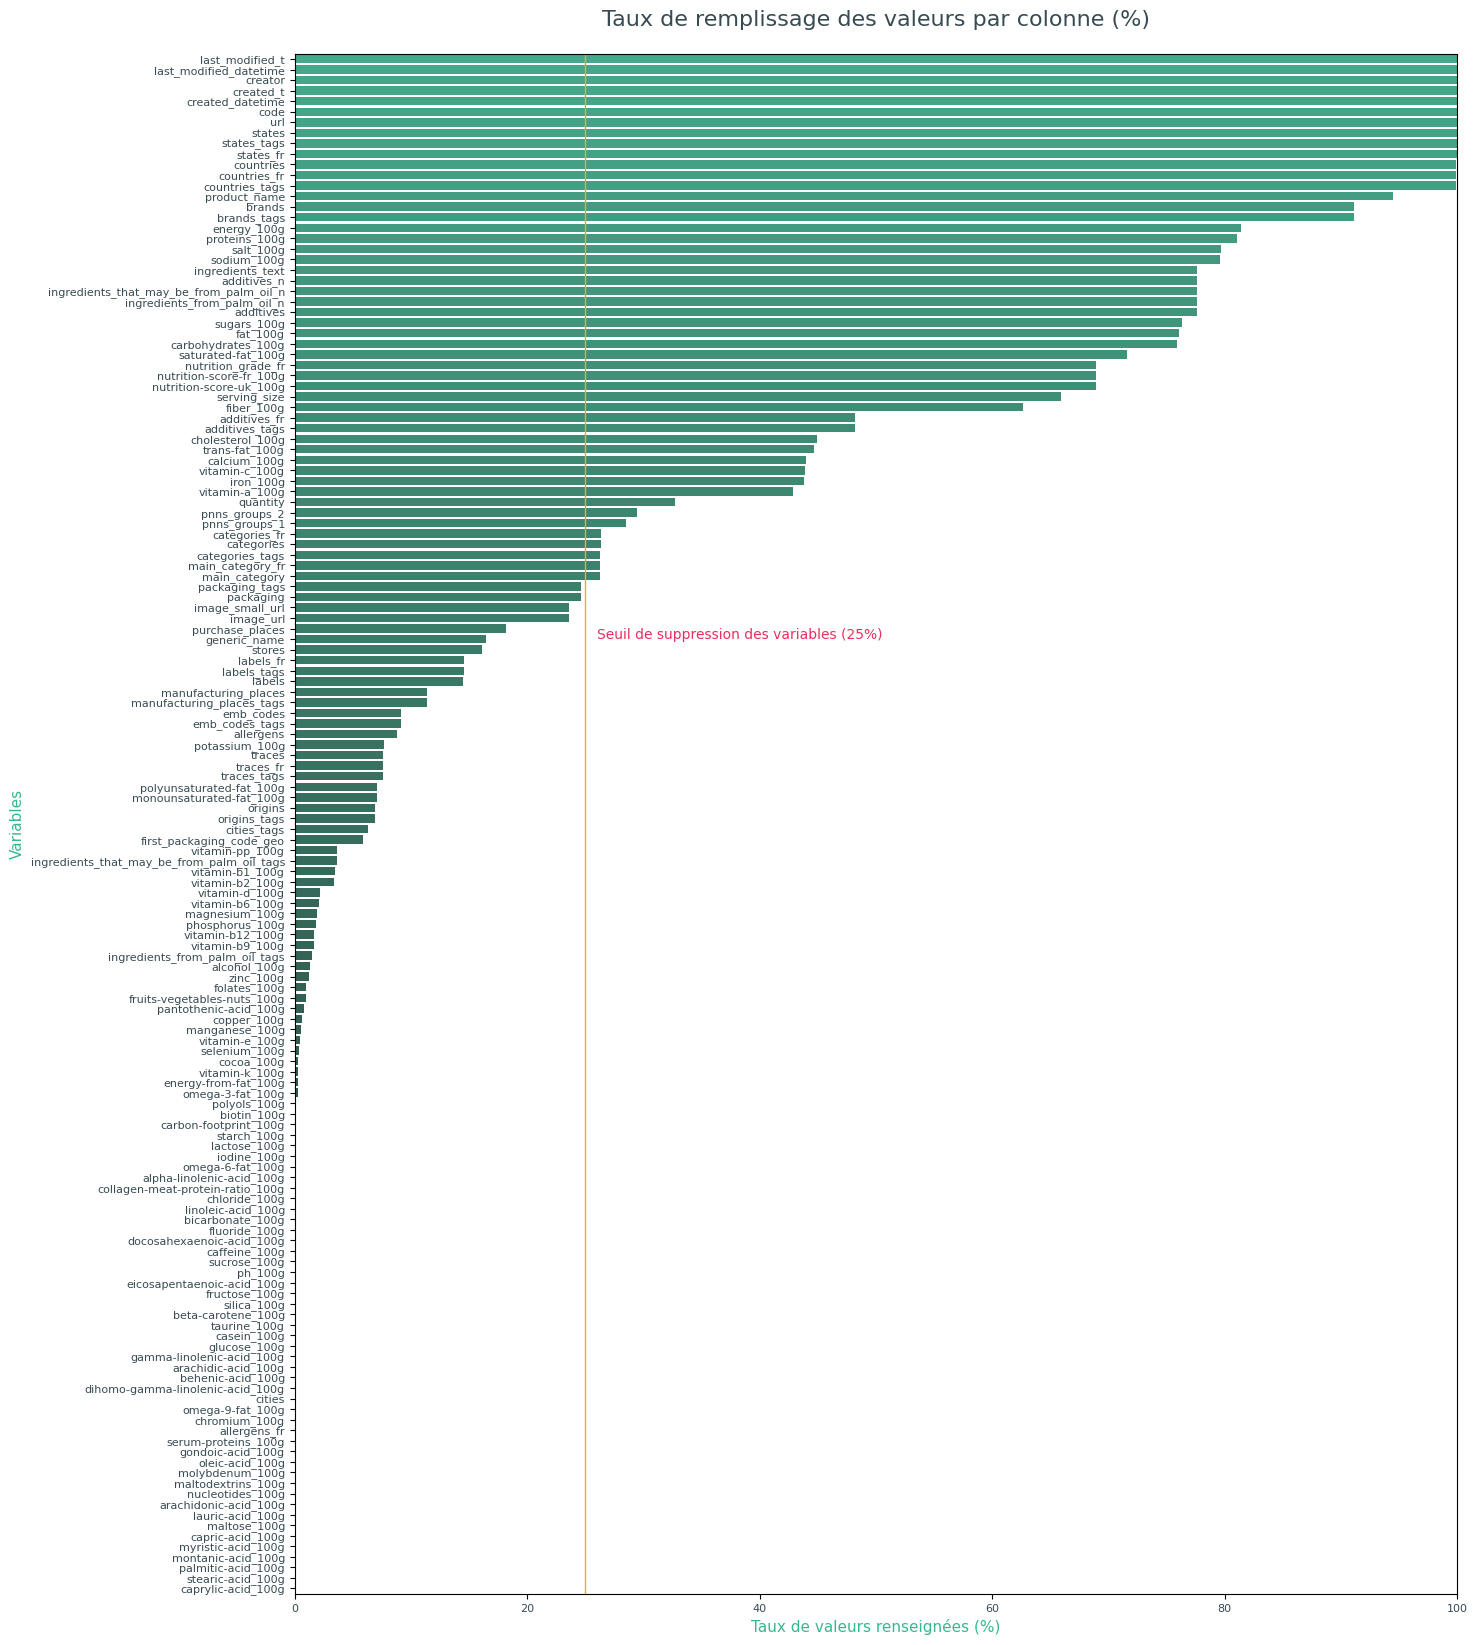

In [14]:
# Observation of zero values (average per column)
plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage des valeurs par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=25, linewidth=1, color = '#ffa51f')
plt.text(25+1, 55, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Set the x-axis limit to 100%
plt.xlim([0, 100])
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

In [15]:
# Instantiation of columns into 2 distinct groups
col_quali = df_food.loc[:,~df_food.columns.str.contains("100g")].columns
col_quanti = df_food.loc[:,df_food.columns.str.contains("100g")].columns

Brève analyse des colonnes qui ne respectent pas le seuil de 25% afin d'identifier la présence d'informations pertinentes avant leur suppressions.

In [16]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]].sample(5)

,code,allergens
237619,3560070100309,"arachide, sésame, avoine, noisettes, lait"
220743,3273070062545,"lait, soja"
245345,3596710295968,soja
191271,3046920044714,"lait, lactose, lait, laitier, orge"
287867,7610403072103,"lait, lait, beurre, soja"


In [17]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]].sample(5)

,code,ingredients_from_palm_oil_tags
269723,5000159486200,huile-de-palme
292443,7613034991782,oleine-de-palme
285917,7574826006049,huile-de-palme
228576,3366321051303,huile-de-palme
282239,5901414200411,huile-de-palme


In [18]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]].sample(5)

,code,traces_fr
184609,26019581,Œufs
250446,3700392470883,"Lait,Fruits à coque,Soja"
280787,5601002009012,"Gluten,Fruits à coque,Arachides"
266575,4388844206700,"Gluten,Lait,Fruits à coque,Arachides,Graines d..."
219452,3270160760763,"Gluten,Fruits à coque,Graines de sésame,Soja"


Deux variables semblent pertinentes. En effet, les informations sur les allergènes et la présence d'huile de palme peuvent servir à l'idée d'application. La présence d'un grand nombre de valeurs manquantes pour ces variables n'est pas synonyme d'un manque d'information mais signifie que peu de produits sont concernés par ces informations, elles sont donc sauvegardées.

In [19]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","ingredients_from_palm_oil_tags"]

Les colonnes qui ne respectent pas le seuil de 25% peuvent maintenant être supprimées, excepté les colonnes identifiées comme utiles pour l'application. 

In [20]:
# Selection of columns containing < 75% null values and columns_to_keep
df_food_v1 = df_food.loc[:, (df_food.isna().mean() < 0.75) | (df_food.columns.isin(columns_to_keep))]

Comparaison de la proportion de valeurs manquantes après la suppression des colonnes qui ne dépassent pas la valeur seuil.

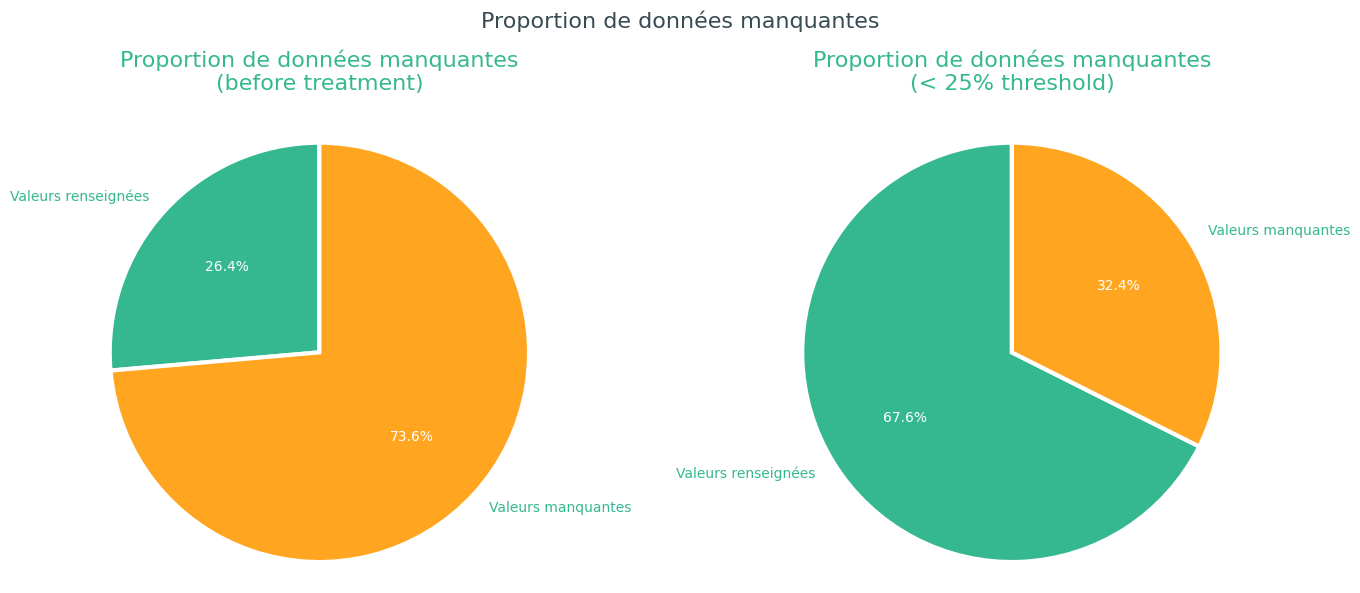

In [21]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

#v1
missing_percentage_v1 = df_food_v1.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage_v1 = 100 - missing_percentage_v1

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
data_v1 = [non_missing_percentage_v1, missing_percentage_v1]
labels = ["Valeurs renseignées", "Valeurs manquantes"]
# Define color code
colors = ["#35B890", '#FFA51F']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Set the main title and subtitle
plt.suptitle("Proportion de données manquantes", color="#384B52", fontsize=16)
# Create pie chart for raw dataset
patches1, texts1, autotexts1 = axes[0].pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[0].set_title("Proportion de données manquantes\n(before treatment)\n", color="#35B890", fontsize=16)
# Customise label colours and sizes
plt.setp(texts1 + autotexts1, color="#35B890", fontsize=10)
plt.setp(autotexts1, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis("equal")

# Create pie chart for deleting unusable data
patches2, texts2, autotexts2 = axes[1].pie(
    data_v1, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[1].set_title("Proportion de données manquantes\n(< 25% threshold)\n", color="#35B890", fontsize=16)
# Customise label colours and sizes
plt.setp(texts2 + autotexts2, color="#35B890", fontsize=10)
plt.setp(autotexts2, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis("equal")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **2. Sélection des produits issus des territoires français**

Maintenant que les données inexploitables sont écartées, la prochaine étape consiste à sélectionner les produits issus des territoires français. Les territoires sont répertoriés sur le site web de l'INSEE à <a href="https://www.insee.fr/fr/metadonnees/definition/c1696">cette page</a> et serviront de référence pour filtrer les produits de la base de données.

Pour commencer, les lignes qui n'ont pas d'informations sur la provenance des produits sont supprimées.

In [22]:
# Delete rows for null values in countries_fr columns
df_food_v1 = df_food_v1.dropna(subset="countries_fr", axis=0)

Ensuite, les produits issus des territoires français sont sélectionnés afin d'obtenir un jeu de données conforme aux besoins de l'application.

In [23]:
# Data selection for French countries only
df_food_fr = df_food_v1.loc[df_food_v1["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

Enfin, il est intéressant de visualiser la proportion de produits issus des territoires français par rapport au reste du monde.

In [24]:
# Instantiation of entries containing the name of a French territory
list_fr_countries = df_food_fr["countries_fr"].unique().tolist()

# Source categorisation function
def country_categ(country):
    if country in list_fr_countries:
      return "Produits français"
    else:
      return "Produits du monde"

In [25]:
# Create a dataframe for analysis
df_proportion_french_products = pd.DataFrame(columns=["provenance"])
# Apply the function to obtain the origin of the products
df_proportion_french_products["provenance"] = df_food["countries_fr"].apply(country_categ)

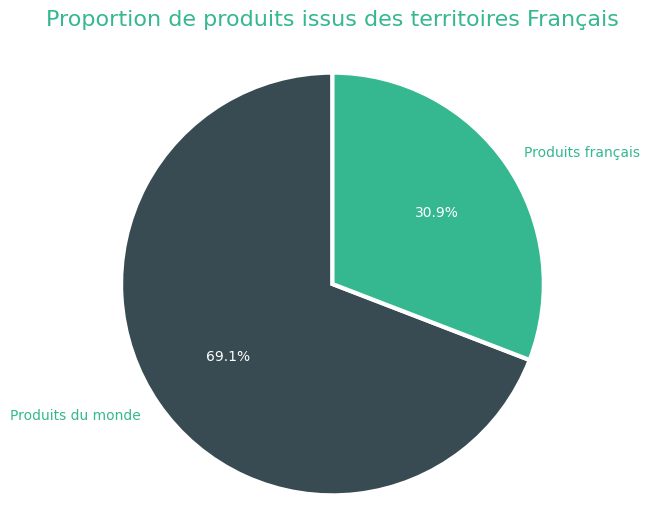

In [26]:
# Count the number of products by origin
provenance_counts = df_proportion_french_products["provenance"].value_counts()
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    provenance_counts, labels=provenance_counts.index,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits issus des territoires Français",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

Comparaison de la proportion de valeurs manquantes après la sélection des produits issus des territoires français

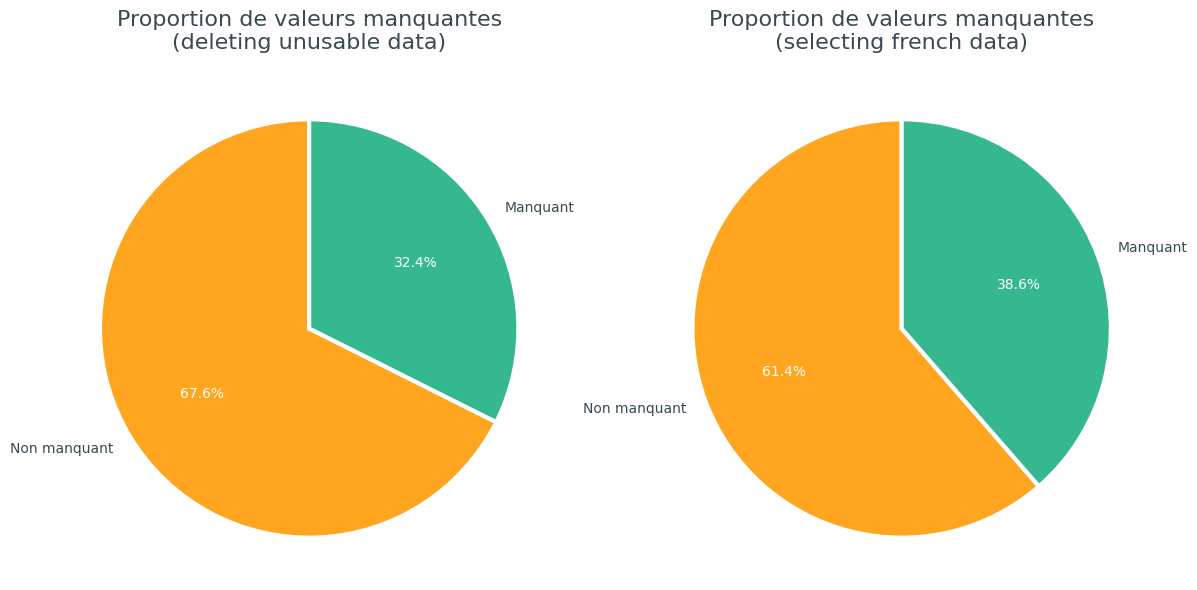

In [27]:
# Calculation of the average percentage of missing values
missing_percentage_fr = df_food_fr.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage_fr = 100 - missing_percentage_fr

#v1
missing_percentage_v1 = df_food_v1.isna().mean().mean() * 100
# Calculation of the proportion of non-missing values
non_missing_percentage_v1 = 100 - missing_percentage_v1

# Data for pie chart
data_v1 = [non_missing_percentage_v1, missing_percentage_v1]
# Data for pie chart
data_fr = [non_missing_percentage_fr, missing_percentage_fr]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#FFA51F", '#35B890']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create pie chart for raw dataset
patches1, texts1, autotexts1 = axes[0].pie(
    data_v1, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[0].set_title("Proportion de valeurs manquantes\n(deleting unusable data)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts1 + autotexts1, color="#384B52", fontsize=10)
plt.setp(autotexts1, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis("equal")

# Create pie chart for deleting unusable data
patches2, texts2, autotexts2 = axes[1].pie(
    data_fr, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
axes[1].set_title("Proportion de valeurs manquantes\n(selecting french data)", pad=20, color="#384B52", fontsize=16)
# Customise label colours and sizes
plt.setp(texts2 + autotexts2, color="#384B52", fontsize=10)
plt.setp(autotexts2, color="white")
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].axis("equal")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **3. Gestion des données par types (quali/quanti)**

Les données inexploitables étant exclues, il est nécessaire de faire le tri des variables en sélectionnant les plus pertinentes pour le projet. Pour cela, la <a href="https://world.openfoodfacts.org/data/data-fields.txt">page de description des variables</a> sert de support méthodologique. Pour commencer, il est intéressant d'afficher la proportion des variables par catégorie. 

In [28]:
# Instantiation of columns by type
col_quali = len(df_food_fr.loc[:,~df_food_v1.columns.str.contains("100g")].columns)
col_quanti = len(df_food_fr.loc[:,df_food_v1.columns.str.contains("100g")].columns)

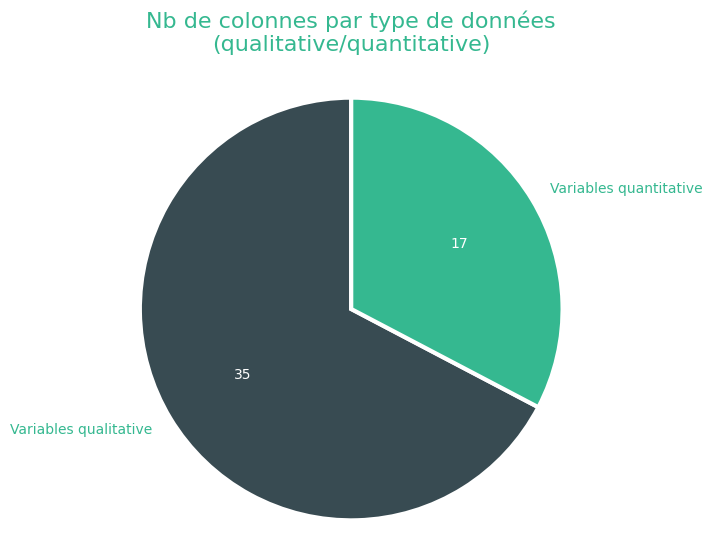

In [29]:
# Category names for display
categories = ["Variables qualitative", "Variables quantitative"]
# Number of columns in each category
data = [col_quali, col_quanti]

# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=categories,
    startangle=90, colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Nb de colonnes par type de données\n(qualitative/quantitative)",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

#### **A. Traitement des informations produit** (variables qualitative)

##### **1. Sélection des variables pertinentes** (variables qualitative)

Ensuite, les généralités donnent des renseignements sur les données et nous permettent d'identifier certaines variables qui ne correspondent pas au projet d'application. Ainsi, les variables  temporelles (`_t` et `_datetime`) et la quantité d'un nutriment pour une portion (`serving_`) peuvent être supprimés. De plus, la sélection des produits issus des territoires français étant déjà réalisée, la colonne `countries` n'est plus utile pour la suite.

In [30]:
# Instantiation of columns to be deleted 
drop_columns = df_food_fr.columns[df_food_fr.columns.str.contains(r"_t$|_datetime$|serving_|countries")].tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=drop_columns)

L'analyse des variables contenant `_tags` permet d'identifier la redondance des informations avec d'autres variables, elles sont donc supprimées également. 

In [31]:
# Value analysis for columns containing "tags
df_food_fr.loc[:,df_food_fr.columns.str.contains("_tags")].sample(3)

,brands_tags,categories_tags,additives_tags,ingredients_from_palm_oil_tags,states_tags
114111,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co..."
187966,corentin-kermeur,"en:canned-foods,en:seafood,en:fishes,en:canned...",NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact..."
204793,marie,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co..."


In [32]:
# Deleting columns
df_food_fr = df_food_fr.drop(columns=df_food_fr.filter(like="_tags").columns)

Dans le cadre d'une politique nutritionnelle, l'état français a lancé en 2001 le <a href="https://www.mangerbouger.fr/ressources-pros/le-programme-national-nutrition-sante-pnns/qu-est-ce-que-le-pnns">Programme National Nutrition Santé (PNNS)</a> avec pour objectif l'amélioration de l'état de santé de l'ensemble de la population. "Ce programme a été reconduit en 2006 (PNNS-2), en 2011 (PNNS-3) et en 2019 (PNNS-4)". 
Le jeu de données contient deux variables (`pnns_groups_1` et `pnns_groups_2`) qui sont normalisées au titre du Plan national de santé publique, ces varibales sont donc conservées pour la catégorisation des produits. Ainsi, les variables `categories` et `_category` peuvent être supprimées.

In [33]:
# Deleting columns
df_food_fr = df_food_fr.drop(columns=df_food_fr.loc[:,df_food_fr.columns.str.contains("categories|category")].columns.tolist())

Analyse du taux de remplissage des dernières colonnes pour s'assurer de leur pertinence.

In [34]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]
null_values["null_value_rates"] = null_values["null_value_rates"]*100

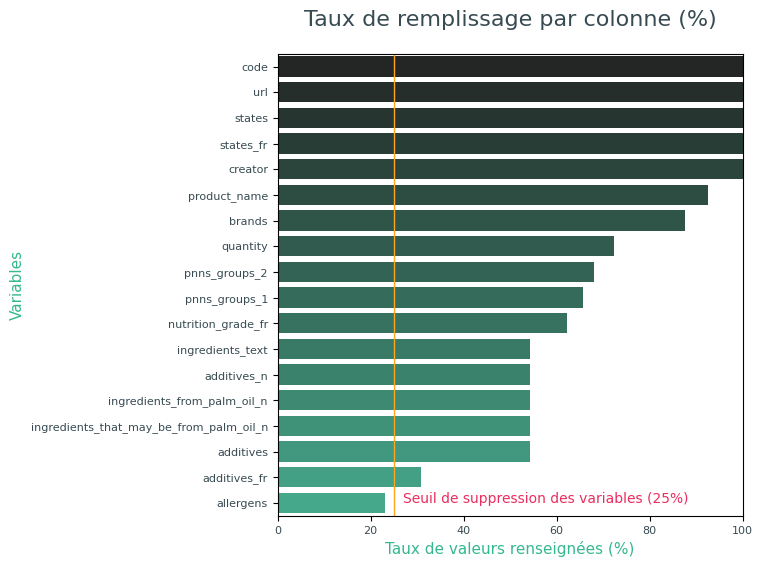

In [35]:
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(null_values),as_cmap=False)

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=random_colors)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=25, linewidth=1, color = '#ffa51f')
plt.text(25+2, 17, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
# Set the x-axis limits from 0% to 100%
plt.xlim(0, 100)  
plt.show()

L'analyse montre un taux de remplissage identique pour les variables contenant `from_palm_oil`. Elle met également en avant des variables redondantes (`additives`,`states`) et des variables qui ne semblent pas pertinentes (`url`,`creator`,`brands`) pour le projet d'application. Ces variables sont observées pour juger de leur pertinence.

In [36]:
# Observation of values
df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].sample(2)

,code,url,creator,product_name,quantity,brands,ingredients_text,allergens,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_fr
178503,2018513799999,http://world-fr.openfoodfacts.org/produit/2018...,kiliweb,Cranberry Mix,NaN,Hema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl..."
224140,3302551145900,http://world-fr.openfoodfacts.org/produit/3302...,openfoodfacts-contributors,Fromage frais de campagne (6% MG),2 kg,La Bressane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl..."


Le contenu des variables restantes démontre qu'il reste des variables non pertinentes pour le projet. Pour rappel, le projet consiste à proposer des menus plus équilibrés que ceux consommés initialement. 

Ainsi, le lien vers le produit (`url`), le créateur de la page produit (`creator`) et l'état de la fiche produit sont inutiles (`states`,`states_fr`). De plus, les propositions de menus seront basées sur la quantité de nutriments pour 100g. Cela exclu la variable de quantité (`quantity`) qui donne le poid du produit à l'achat et le détail des ingrédients contenus dans le produit (`ingredients_text`) qui eux, peuvent être des informations intéressantes pour un projet plus avancé... Enfin, les variables `additives` sont redondantes, le projet étant construit sur des produits issus de territoires français, seule la variable `additives_fr` sera conservée.

In [37]:
# Instantiation of columns containing "may_be_from_palm_oil"
col_irrelevant = df_food_fr.loc[:,df_food_fr.columns.str.contains("may_be_from_palm_oil|url|creator|quantity|ingredients_text|states|additives_n|additives$")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_irrelevant)

##### **2. Nettoyage et mise en forme des données** (variables qualitative)

Les variables `code` et `product_name` sont les identifiants unique de chaque produits, les doublons et/ou valeurs manquantes sont donc supprimés.

In [38]:
# Sum of duplicated values
nb_duplicated = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")][["product_name","code"]].duplicated().sum()
print("Nombre de valeurs dupliquées: {}".format(nb_duplicated))

Nombre de valeurs dupliquées: 0


In [39]:
# Counts the number of missing values
missing_percentage_product = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["product_name"].isnull().sum()
missing_percentage_code = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["code"].isnull().sum()
# Counts the number of values entered
non_missing_percentage_product = len(df_food_fr) - missing_percentage_product
non_missing_percentage_code = len(df_food_fr) - missing_percentage_code

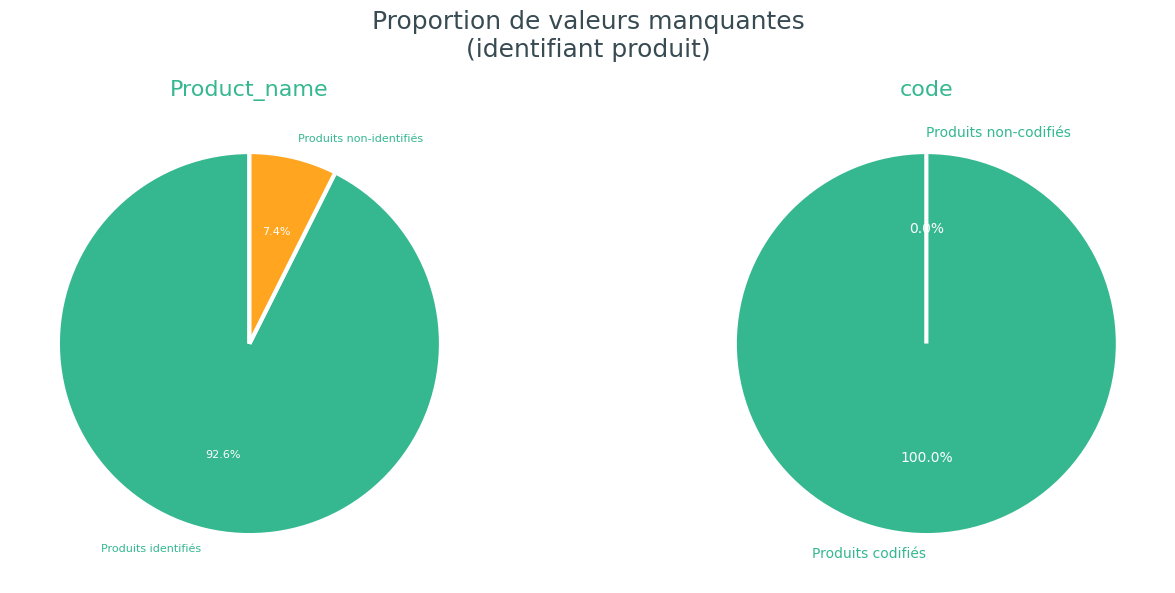

In [40]:
# Data for pie chart - qualitative columns
data_product = [non_missing_percentage_product, missing_percentage_product]
labels_product = ["Produits identifiés", "Produits non-identifiés"]

# Data for pie chart - quantitative columns
data_code = [non_missing_percentage_code, missing_percentage_code]
labels_code = ["Produits codifiés", "Produits non-codifiés"]

colors = ["#35B890","#ffa51f"]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Add a global title
plt.suptitle("Proportion de valeurs manquantes\n(identifiant produit)", fontsize=18, color="#384B52")

# Create pie chart for qualitative columns
patches, texts, autotexts = axs[0].pie(
    data_product, labels=labels_product,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("Product_name", color="#35B890", fontsize=16)

# Set custom label colors and sizes for qualitative pie chart
for text in texts:
    text.set_color("#35B890")
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)

# Create pie chart for quantitative columns
patches, texts, autotexts = axs[1].pie(
    data_code, labels=labels_code,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1].set_title("code", color="#35B890", fontsize=16)

# Set custom label colors and sizes for quantitative pie chart
for text in texts:
    text.set_color("#35B890")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

L'analyse montre qu'il n'y a pas de valeurs dupliquées pour ces variables mais indique que certains produits n'ont pas de nom (`product_name`), ils sont donc supprimés de la base de données.

In [41]:
# Delete lines containing missing values
df_food_fr = df_food_fr.dropna(subset="product_name")

La présence d'allergènes ou d'additifs est une information pertinente mais il n'est pas nécessaire d'avoir les détails pour le projet. Ainsi, les valeurs sont remplacées par `1` et `0` lorsqu'il n'y a pas de valeurs. Il en va de même pour la présence d'huile de palme, en précisant que la valeur 0 signifie une absence d'huile de palme; cette valeur est donc remplacée par une valeur manquante et les données sont formatées sous la forme `1` ou `0` également. Par soucis de clarté, les valeurs de qualité nutritionnelle sont transformées en majuscule.

In [42]:
# Replace NaN values with 0 and non-NaN values with 1
df_food_fr["additives_fr"] = df_food_fr["additives_fr"].notnull().astype(int)
df_food_fr["allergens"] = df_food_fr["allergens"].notnull().astype(int)
# Replace NaN values with 0 and convert to integer
df_food_fr["ingredients_from_palm_oil_n"] = df_food_fr["ingredients_from_palm_oil_n"].fillna(0).astype(int)
# Replaces the values >= 1
df_food_fr.loc[df_food_fr["ingredients_from_palm_oil_n"] >= 1, "ingredients_from_palm_oil_n"] = 1
# Capitalize values
df_food_fr["nutrition_grade_fr"] = df_food_fr["nutrition_grade_fr"].str.upper()

Pour terminer, les variables catégorielles (`pnns_groups_1` et `pnns_groups_2`) contiennent des valeurs dupliquées en raison d'une casse différente. Elle contient également des valeurs "Unknown" qui sont remplacées par `NaN` parr soucis de cohérence. 

In [43]:
# replace the unknown values
df_food_fr.loc[:,['pnns_groups_1', 'pnns_groups_2']] = df_food_fr.loc[:,['pnns_groups_1', 'pnns_groups_2']].replace('unknown', np.nan)

In [44]:
# Format texts on categorical variables
df_food_fr[['pnns_groups_1', 'pnns_groups_2']] = df_food_fr[['pnns_groups_1', 'pnns_groups_2']].apply(lambda x: x.str.capitalize())
df_food_fr["pnns_groups_1"] = df_food_fr["pnns_groups_1"].str.replace("-", " ")

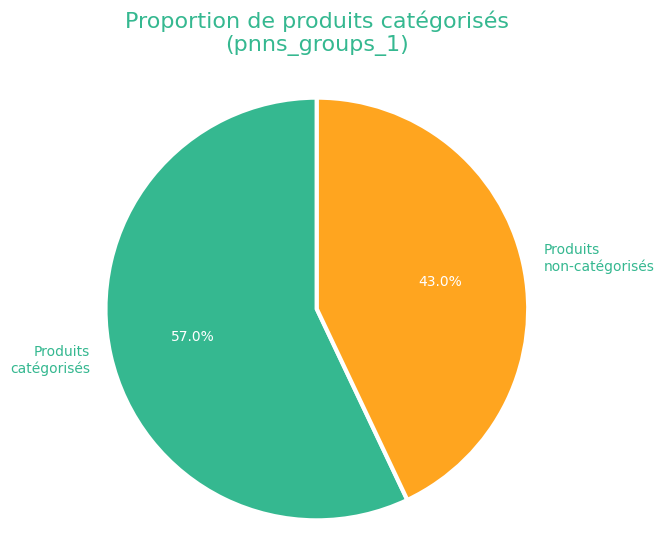

In [45]:
# Calculation of the number of categorized products
product_categ = df_food_fr["pnns_groups_1"].notnull().sum()
product__non_categ = df_food_fr["pnns_groups_1"].isnull().sum()

# Data for pie chart
data = [product_categ, product__non_categ]
labels = ["Produits\ncatégorisés", "Produits\nnon-catégorisés"]
# Define color code
colors = ["#35B890",'#ffa51f']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits catégorisés\n(pnns_groups_1)",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

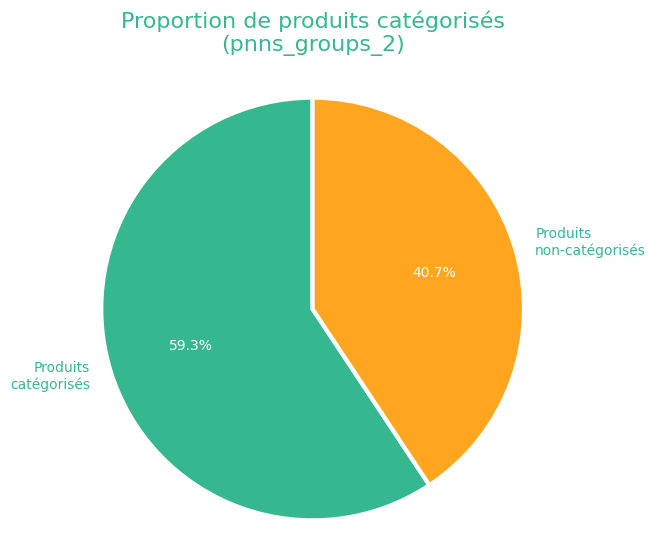

In [46]:
# Calculation of the number of categorized products
product_categ = df_food_fr["pnns_groups_2"].notnull().sum()
product__non_categ = df_food_fr["pnns_groups_2"].isnull().sum()

# Data for pie chart
data = [product_categ, product__non_categ]
labels = ["Produits\ncatégorisés", "Produits\nnon-catégorisés"]
# Define color code
colors = ["#35B890",'#ffa51f']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits catégorisés\n(pnns_groups_2)",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

#### **B. Traitement des valeurs nutritionnelles** (variables quantitatives)

Etant donnée que les produits séléctionnés sont exclusivement issus des territoires français, la variable `nutrition-score-uk_100g` est supprimée.

In [47]:
# Delete column
df_food_fr = df_food_fr.drop(columns="nutrition-score-uk_100g")

Analyse du taux de remplissage des colonnes.

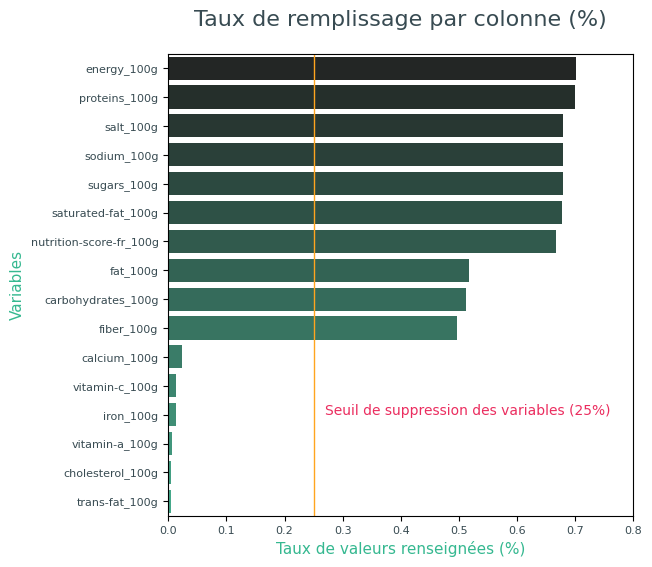

In [48]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]

# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(null_values),as_cmap=False)

# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=random_colors)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=0.25, linewidth=1, color = '#ffa51f')
plt.text(0.25+0.02, 12, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Plusieurs **variables sont en deça du seuil de 25%** de valeurs renseignées. Elles peuvent être pertinentes dans la mesure ou le nombre théorique de produits contenant ces nutriments est faible. Cependant, **la présence de valeurs égale à zéro** donnent à penser que ce sont des produits qui ne contiennnent pas le nutriment en question, il n'est donc **pas pertinent de considérer les valeurs NaN comme une absence du nutriment**. Ces variables sont donc **considérées comme inexploitables et supprimées** du jeu de données. 

In [49]:
# Filter columns with "100g"
col_100g = df_food_fr.columns[df_food_fr.columns.str.contains("100g")]
# Selects variables > 25% of values filled in
col_100g_75_nan = col_100g[df_food_fr[col_100g].notnull().mean() < 0.25]
# Delete column
df_food_fr = df_food_fr.drop(columns=col_100g_75_nan)

##### **1. Gestion des outliers**

Les colonnes avec le suffixe `_100g` (hors `ernergy_100g`) doivent contenir des valeurs >= 100. Ainsi, toutes les valeurs dépassants ce seuil sont remplacées par `NaN`. Il en va du même principe pour la variable `ernergy_100g` qui ne peut être supérieur à 3800kJ puisque l'apport énergétique approximatif par gramme de lipides est de 38kJ/g (<a href="[Composition nutritionnelle des aliments](https://fr.wikipedia.org/wiki/Composition_nutritionnelle_des_aliments)">source wikipédia</a>).

In [50]:
# Instantiation of nutritional columns 100g
nutrition_columns = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].drop(columns=["energy_100g","nutrition-score-fr_100g"]).columns.tolist()

Observation du nombre de valeurs supérieur à 100g avant supression.

In [51]:
# Check for values > 100
nb_outlier_100g = (df_food_fr[nutrition_columns]>100).sum()
nb_outlier_100g = pd.DataFrame(nb_outlier_100g[nb_outlier_100g > 0]).reset_index()
nb_outlier_100g = nb_outlier_100g.rename(columns={"index": "Columns", 0: "Nb_outliers"})

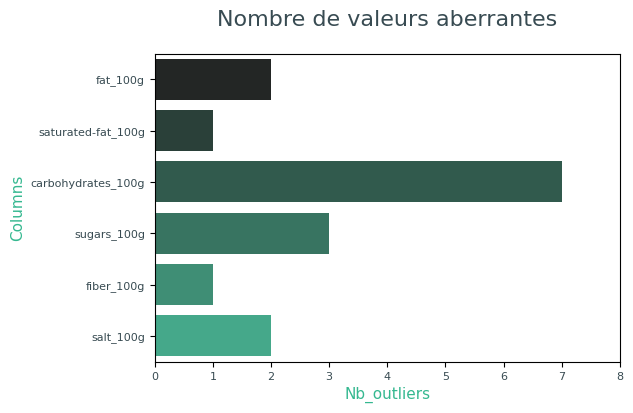

In [52]:
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(nb_outlier_100g),as_cmap=False)
# Observation of zero values (average per column)
plt.figure(figsize=(6,4))
plt.title("Nombre de valeurs aberrantes",pad=20,color="#384B52",fontsize=16)
ax = sns.barplot(nb_outlier_100g, x="Nb_outliers", y="Columns", palette=random_colors)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb_outliers",color='#35B890', fontsize=11)
plt.ylabel("Columns",color='#35B890', fontsize=11)
plt.show()

In [53]:
# Count the number of values > 3800
nb_outlier_3800kj = (df_food_fr["energy_100g"]>3800).sum()
data = {"Column": ["energy_100g"], "Nb_outliers": [nb_outlier_3800kj]}
outlier_3800kj = pd.DataFrame(data=data)

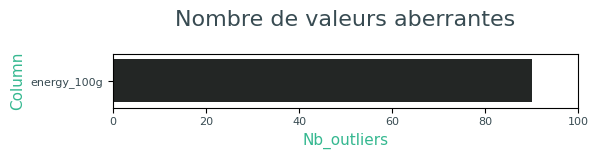

In [54]:
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(outlier_3800kj),as_cmap=False)
# Observation of zero values (average per column)
plt.figure(figsize=(6,0.7))
plt.title("Nombre de valeurs aberrantes",pad=20,color="#384B52",fontsize=16)
ax = sns.barplot(outlier_3800kj, x="Nb_outliers", y="Column", palette=random_colors)
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Nb_outliers",color='#35B890', fontsize=11)
plt.ylabel("Column",color='#35B890', fontsize=11)
plt.show()

In [55]:
# Total number of outliers
print("Soit un total de",(df_food_fr[nutrition_columns]>100).sum().sum() + nb_outlier_3800kj,"valeurs aberrantes")

Soit un total de 106 valeurs aberrantes


In [56]:
# Replace the values > 100 per NaN
df_food_fr[nutrition_columns] = df_food_fr[nutrition_columns].where(df_food_fr[nutrition_columns] < 100, np.nan)
# Replace the values > 3800 per NaN
df_food_fr.loc[df_food_fr["energy_100g"] > 3800, "energy_100g"] = np.nan

Maintenant que les valeurs abberantes sont supprimées, il est interessant d'observer la distribution des données nutrionnelles ainsi que les relations par paire.

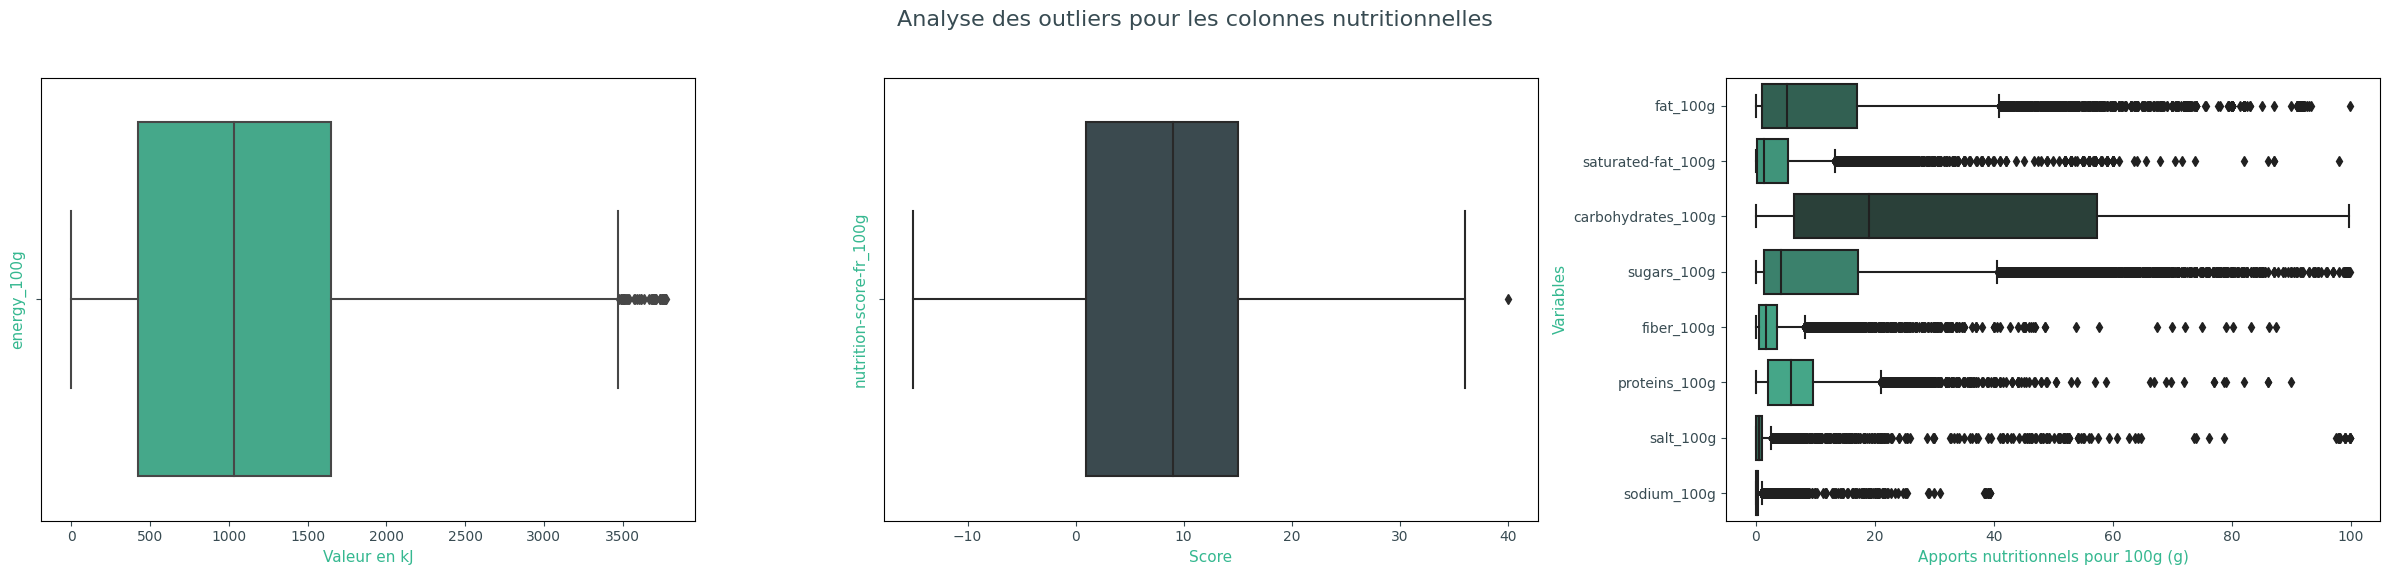

In [57]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Add a global title above the subplots
fig.suptitle("Analyse des outliers pour les colonnes nutritionnelles", fontsize=16, color="#384B52")

# Plot the first boxplot
sns.boxplot(data=df_food_fr, x="energy_100g", ax=axes[0], color="#35B890")
axes[0].set_xlabel("Valeur en kJ", color='#35B890', fontsize=11)
axes[0].set_ylabel("energy_100g", color='#35B890', fontsize=11)
axes[0].tick_params(axis='both', colors='#384B52')

# Plot the second boxplot
sns.boxplot(data=df_food_fr, x="nutrition-score-fr_100g", ax=axes[1], color="#384B52")
axes[1].set_xlabel("Score", color='#35B890', fontsize=11)
axes[1].set_ylabel("nutrition-score-fr_100g", color='#35B890', fontsize=11)
axes[1].tick_params(axis='both', colors='#384B52')

# Select 5 random colors from your palette
random_colors = random.sample(palette_map, len(nutrition_columns))

# Plot the third boxplot
sns.boxplot(data=df_food_fr[nutrition_columns].dropna(), ax=axes[2], palette=random_colors, orient="h")
axes[2].set_xlabel("Apports nutritionnels pour 100g (g)", color='#35B890', fontsize=11)
axes[2].set_ylabel("Variables", color='#35B890', fontsize=11)
axes[2].tick_params(axis='both', colors='#384B52')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
# Display the plot
plt.show()

In [58]:
'''import warnings
# Ignore UserWarning warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Select columns containing "100g" or "pnns_groups_1"
df_pairplot = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g") | (df_food_fr.columns == "pnns_groups_1")]
# Colour palette for the various graphics
random_colors = sns.color_palette("dark:#35B890", n_colors=len(df_pairplot["pnns_groups_1"].unique()))

# Set up the figure size
plt.figure(figsize=(15,20))
# Create the pairplot with the custom palette
ax = sns.pairplot(df_pairplot,hue="pnns_groups_1", palette=random_colors)
# Set the color of tick labels
ax.tick_params(axis='both', colors='#384B52')
# Set the global title
plt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS 1", y=1.02, fontsize=40, color="#384B52")
# Display the plot
plt.show()'''

'import warnings\n# Ignore UserWarning warnings\nwarnings.filterwarnings("ignore", category=UserWarning)\n\n# Select columns containing "100g" or "pnns_groups_1"\ndf_pairplot = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g") | (df_food_fr.columns == "pnns_groups_1")]\n# Colour palette for the various graphics\nrandom_colors = sns.color_palette("dark:#35B890", n_colors=len(df_pairplot["pnns_groups_1"].unique()))\n\n# Set up the figure size\nplt.figure(figsize=(15,20))\n# Create the pairplot with the custom palette\nax = sns.pairplot(df_pairplot,hue="pnns_groups_1", palette=random_colors)\n# Set the color of tick labels\nax.tick_params(axis=\'both\', colors=\'#384B52\')\n# Set the global title\nplt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS 1", y=1.02, fontsize=40, color="#384B52")\n# Display the plot\nplt.show()'

##### **Outliers - salt_100g et sodium_100g**

Dans les faits, **40 % du poids du sel est constitué de sodium** et cela se constate par une relation linéaire "parfaite" entre les variables `salt_100g` et `sodium_100g`. Ainsi, l'une des colonnes peut être supprimée sans avoir d'impact sur la qualité des informations nutritionnelles liée au sel.

In [59]:
# Deleting the sodium column
df_food_fr = df_food_fr.drop(columns="sodium_100g", axis=1)

##### **Outliers - saturated-fat_100g et fat_100g**

La relation entre les graisses et les graisses saturées est de la même nature que celle entre le sel et le sodium, à la différence que la relation n'est pas parfaitement linéaire. La relation entre ces deux nutriments se réfère généralement à la proportion de graisses saturées dans l'apport total en graisses. Ainsi, la quantité de graisses saturées ne peut être supérieur à celle des graisses, ces valeurs sont donc remplacées par `NaN`.

In [60]:
# Eliminating saturated fats > Fat values
df_food_fr.loc[df_food_fr["saturated-fat_100g"] > df_food_fr["fat_100g"],["saturated-fat_100g", "fat_100g"]] = np.nan

##### **Outliers - carbohydrates_100g et sugars_100g**

De même, dans la littérature scientifique, il existe une relation étroite entre les hydrates de carbone et le sucre. Les hydrates de carbone (également appelés glucides) sont une classe de composés chimiques qui comprennent différents types de sucres. Les sucres, quant à eux, sont un sous-groupe des hydrates de carbone. Le sucre que nous consommons généralement dans notre alimentation quotidienne est principalement du saccharose, un disaccharide composé de glucose et de fructose. Ainsi, la quantité de sucre ne peut être supérieur à celle des hydrates de carbone, dans le cas contraire les valeurs sont remplacées par `NaN`.

In [61]:
# Eliminating sugars > carbohydrates values
df_food_fr.loc[df_food_fr["sugars_100g"] > df_food_fr["carbohydrates_100g"],["sugars_100g", "carbohydrates_100g"]] = np.nan

##### **Choix finaux**

L'une des dernière étape du nettoyage consiste à supprimer les lignes qui possèdent moins 2 valeurs dans les colonnes nutritionnelles. La pertiennces de ces lignes est en question et peut nuire à l'étape d'imputation.

In [62]:
# Deletes lines with at least 2 non-null values in columns containing "100g"
df_food_fr.dropna(thresh=2, subset=df_food_fr.columns[df_food_fr.columns.str.contains("100g")], inplace=True)

Enfin, les produits qui n'ont pas de catégories peuvent être exploités et catégorisés dans un second temps. Cela nécessite un traitement plus spécifique qui n'est pas indispensable pour les besoins de l'application, ils sont donc supprimés.

In [63]:
# Delete lines that have no category
df_food_fr = df_food_fr.loc[df_food_fr['pnns_groups_2'] != 'Unknown']
df_food_fr = df_food_fr.dropna(subset=['pnns_groups_2','pnns_groups_1'])

Observation des valeurs manquantes après le nettoyage des données. 

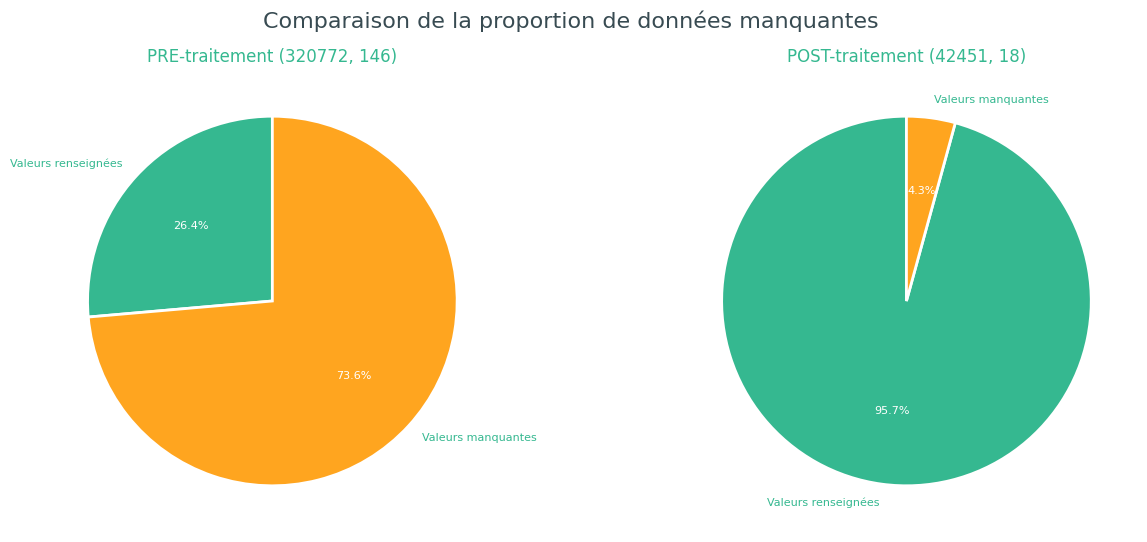

In [64]:
# Calculation of the average percentage of missing values - PRE traitement
missing_percentage_pre = df_food.isna().mean().mean() * 100
non_missing_percentage_pre = 100 - missing_percentage_pre

# Data for pie chart - PRE traitement
data_pre = [non_missing_percentage_pre, missing_percentage_pre]
labels_pre = ["Valeurs renseignées", "Valeurs manquantes"]
colors_pre = ["#35B890", '#FFA51F']

# Calculation of the average percentage of missing values - POST traitement
missing_percentage_post = df_food_fr.isna().mean().mean() * 100
non_missing_percentage_post = 100 - missing_percentage_post

# Data for pie chart - POST traitement
data_post = [non_missing_percentage_post, missing_percentage_post]
labels_post = ["Valeurs renseignées", "Valeurs manquantes"]
colors_post = ["#35B890", '#FFA51F']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot first pie chart - PRE traitement
patches1, texts1, autotexts1 = ax1.pie(
    data_pre, labels=labels_pre,
    startangle=90, colors=colors_pre, autopct="%1.1f%%",
    wedgeprops={"linewidth": 2, "edgecolor": "white"})
ax1.set_title(f"PRE-traitement {df_food.shape}",color="#35B890", fontsize=12)
plt.setp(texts1 + autotexts1, color="#35B890", fontsize=8)
plt.setp(autotexts1, color="white")

# Plot second pie chart - POST traitement
patches2, texts2, autotexts2 = ax2.pie(
    data_post, labels=labels_post,
    startangle=90, colors=colors_post, autopct="%1.1f%%",
    wedgeprops={"linewidth": 2, "edgecolor": "white"})
ax2.set_title(f"POST-traitement {df_food_fr.shape}",color="#35B890", fontsize=12)
plt.setp(texts2 + autotexts2, color="#35B890", fontsize=8)
plt.setp(autotexts2, color="white")
# Set the global title
plt.suptitle("Comparaison de la proportion de données manquantes\n\n",fontsize=16, color="#384B52")
# Display the plot
plt.show()

Pour terminer, les produits qui ne sont pas catégorisés dans un groupes PNNS sont supprimés. En effet, le but de l'application est de proposer des menus plus équilibrés tout en respectant les préférences alimentaire de la personne, cad proposer des aliments plus "sains" dans un même groupe de produits. 

## **3. Imputation des données manquantes (nutriments)**
***


Afin d'obtenir un jeu de données complet et exploitable, il est nécessaire d'imputer les données manquantes. Plusieurs méthodes sont utilisées pour cela, l'imputation par la moyenne globale sera utilisée dans un 1er temps puis par la moyenne des catégories de produits (`pnns_groups_2`) et enfin par la méthode des plus proches voisins (`KNN-Imputer`).

### **1. Imputation de la moyenne globale**

In [65]:
# Column instantiation
col_nutri = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g")].columns.tolist()

La moyenne de chaque colonne est imputée aux valeurs `NaN` qu'elles contiennent. Une analyse des indicateurs globaux est ensuite réalisée.

In [66]:
# Allocation of general average
df_mean_brut = df_food_fr[col_nutri].fillna(df_food_fr[col_nutri].mean())

In [67]:
df_mean_brut.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.00000,42451.000000
mean,1087.333885,12.746362,5.332293,27.161838,12.634689,2.604202,7.646637,0.87382,8.383935
std,784.343551,15.256755,8.099858,26.388289,17.690656,2.928940,7.337658,1.49207,8.806518
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.00000,-15.000000
25%,393.000000,1.400000,0.300000,4.400000,1.100000,1.100000,1.600000,0.08000,1.000000
50%,999.000000,7.700000,2.100000,15.900000,4.500000,2.604202,6.000000,0.62000,8.383935
75%,1633.000000,19.500000,6.900000,51.300000,14.300000,2.604202,11.000000,1.20000,15.000000
max,3772.000000,99.900000,95.000000,99.900000,99.900000,86.200000,86.000000,76.20000,40.000000


### **2. Imputation de la moyenne par catégorie (pnns_groups_2)**

In [68]:
# Copy of original DataFrame
df_food_mean_pnns = df_food_fr.copy()

La moyenne de chaque catégorie de produits est imputée aux valeurs `NaN` des produits correspondants. Une analyse des indicateurs globaux est ensuite réalisée.

In [69]:
# Calculation of nutrition group average
mean_pnns = df_food_mean_pnns.loc[:, ['pnns_groups_2'] + col_nutri].groupby('pnns_groups_2').mean()

# Browse every column that might have NaNs
for col in col_nutri:
    # Replace the NaN in the current column with the group average 'pnns_groups_2'.
    df_food_mean_pnns[col] = df_food_mean_pnns.apply(
        # Replace NaN with the corresponding 'pnns_groups_2' average 
        lambda row: mean_pnns.loc[row['pnns_groups_2'], col] if pd.isna(row[col]) else row[col],
        axis=1
    )

In [70]:
mean_pnns.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1044.563259,12.734510,4.732974,25.043994,11.105747,2.614982,7.262082,0.766898,7.502384
std,726.706567,15.023948,6.114195,22.223043,13.237585,2.666019,6.146532,0.720607,6.771475
min,94.691225,0.076913,0.028699,0.736125,0.521120,0.080746,0.156599,0.017980,-4.986328
25%,449.925035,3.905799,1.212769,7.234942,2.134717,0.518505,2.684145,0.169191,2.751437
50%,938.833160,8.567530,2.704503,18.237620,5.812405,1.758380,6.622684,0.525340,6.706099
75%,1469.837297,16.638712,6.145424,50.338455,15.721135,3.814982,9.962468,1.224630,13.066292
max,3027.760981,74.072759,29.778820,69.119688,50.418663,9.692308,19.855332,2.621968,21.667413


### **3. Imputation via KNN-Imputer**

In [71]:
# Copy of original DataFrame
df_food_knn_pnns = df_food_fr.copy()

In [72]:
# Calculation of nutrition group median
knn_pnns = df_food_knn_pnns.loc[:, col_nutri]
# Instance of the KNNImputer class with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)
# Replacing missing values in knn_pnns using the KNN algorithm
df_imputed = knn_imputer.fit_transform(knn_pnns)
# Creating a new DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=col_nutri)

In [73]:
# Calculation of nutrition group median
knn_pnns = df_food_knn_pnns.loc[:, col_nutri]
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(knn_pnns)
df_imputed = pd.DataFrame(df_imputed, columns=col_nutri)

In [74]:
# Assign the same indexes as df_food_knn_pnns to df_imputed
df_imputed.index = df_food_knn_pnns.index

In [75]:
# Assigning df_imputed values to nutrition columns in df_food_knn_pnns
df_food_knn_pnns.loc[:, col_nutri] = df_imputed

In [76]:
df_food_knn_pnns.describe()

,allergens,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000,42451.000000
mean,0.431132,0.553038,0.065864,1087.472008,12.876263,5.278374,26.445658,12.703341,2.151700,7.639253,0.871013,8.392160
std,0.495240,0.497185,0.248047,784.884122,15.906073,8.192930,26.885078,18.125360,3.132022,7.350439,1.501441,9.013811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,393.000000,1.000000,0.220000,3.900000,1.000000,0.340000,1.500000,0.070000,1.000000
50%,0.000000,1.000000,0.000000,996.000000,6.200000,1.800000,13.000000,4.000000,1.280000,6.000000,0.568960,8.000000
75%,1.000000,1.000000,0.000000,1633.000000,21.000000,7.200000,52.000000,15.900000,2.900000,11.000000,1.200000,15.000000
max,1.000000,1.000000,1.000000,3772.000000,99.900000,95.000000,99.900000,99.900000,86.200000,86.000000,76.200000,40.000000


##### **Analyse des imputations**

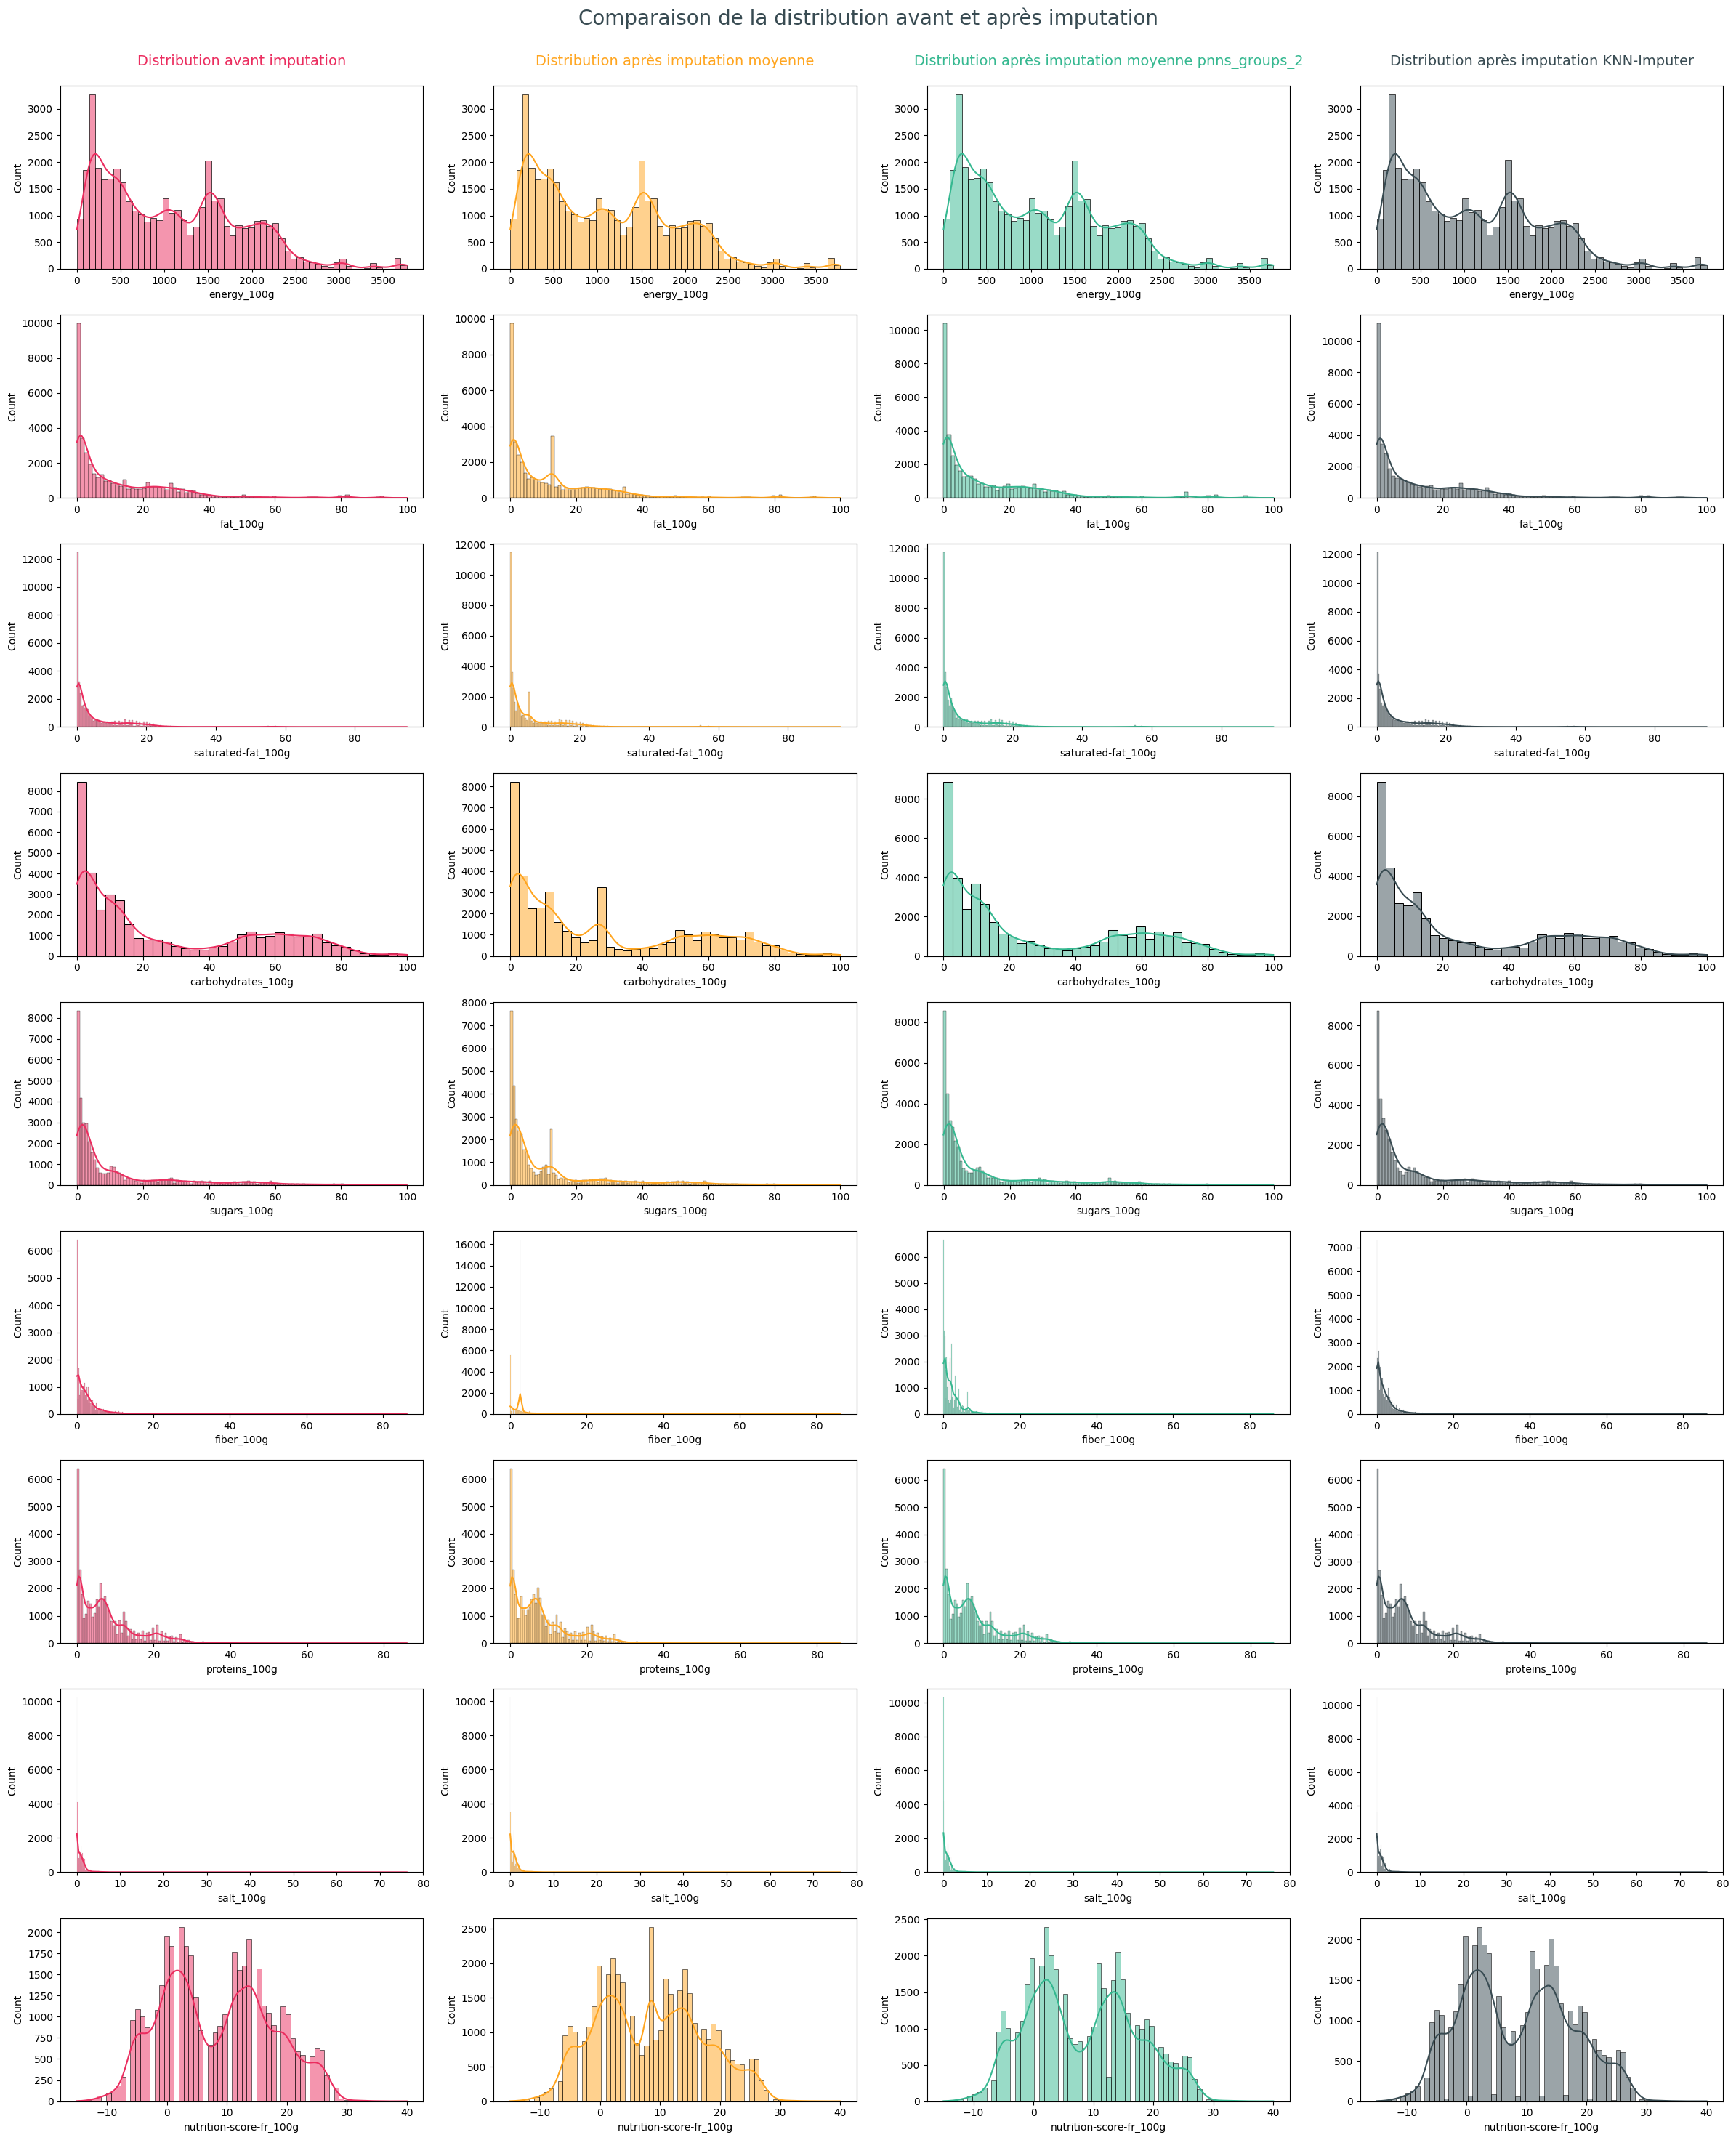

In [77]:
# Color palette
palette_map = ["#EB2D5F", "#ffa51f", "#35B890", "#384B52"]

# Create a subgraph grid with 4 columns
fig, axes = plt.subplots(len(col_nutri), 4, figsize=(24, 30))
# Global title
fig.suptitle("Comparaison de la distribution avant et après imputation\n\n", fontsize=20, color="#384B52")

# Loop on nutritional columns
for i, col in enumerate(col_nutri):

    sns.histplot(data=df_food_fr, x=col, ax=axes[i, 0], color=palette_map[0], kde=True)
    if i == 0:
        axes[i, 0].set_title(f"Distribution avant imputation", pad=20, color=palette_map[0], fontsize=14)

    # Distribution after average imputation
    sns.histplot(data=df_mean_brut, x=col, ax=axes[i, 1], color=palette_map[1], kde=True)
    if i == 0:
        axes[i, 1].set_title(f"Distribution après imputation moyenne", pad=20, color=palette_map[1], fontsize=14)

    # Distribution after average imputation pnns_groups_2
    sns.histplot(data=df_food_mean_pnns, x=col, ax=axes[i, 2], color=palette_map[2], kde=True)
    if i == 0:
        axes[i, 2].set_title(f"Distribution après imputation moyenne pnns_groups_2", pad=20, color=palette_map[2], fontsize=14)

    # Distribution after imputation Standard deviation
    sns.histplot(data=df_food_knn_pnns, x=col, ax=axes[i, 3], color=palette_map[3], kde=True)
    if i == 0:
        axes[i, 3].set_title(f"Distribution après imputation KNN-Imputer", pad=20, color=palette_map[3], fontsize=14)

# Adjust spacing between subgraphs
plt.tight_layout()
# Display graphics
plt.show()

### **4. Imputation du nutrition_grade_fr**

##### **Qu'est-ce que le nutrition-score-fr_100g ?**

Le [Nutri-Score](https://fr.wikipedia.org/wiki/Nutri-score) a été mis au point par des équipes de recherche internationales indépendantes composées de scientifiques, de médecins et de nutritionnistes, pour rendre les informations nutritionnelles plus faciles à décrypter. Pour classer chaque produit, le Nutri-Score prend en compte, pour 100 grammes de produit, la teneur :

- en nutriments et aliments à favoriser : fibres, protéines, fruits et légumes, légumes secs…
- en nutriments à limiter : calories, acides gras saturés, sucres, sel
  
Un produit qui possède **un Nutri-Score faible est un produit de bonne qualité** (Nutri-Score -10) et à contrario, un produit ayant un Nutri-Score élevé est de moindre qualité.

In [78]:
# Count zero values
df_food_knn_pnns[["product_name","nutrition-score-fr_100g"]].sample(2)

,product_name,nutrition-score-fr_100g
221801,Sauce blanche,12.0
208969,Chili con carne,-4.0


Les valeurs imputées à `nutrition-score-fr_100g` sont des nombres décimaux, ils sont donc **arrondis à l'entier supérieur** afin de correspondre à la nomenclature du `nutrition_grade_fr`.

In [79]:
# Round up nutri-score values to the nearest whole number
df_food_knn_pnns["nutrition-score-fr_100g"] = np.ceil(df_food_knn_pnns["nutrition-score-fr_100g"])
# Change column type
df_food_knn_pnns["nutrition-score-fr_100g"] = df_food_knn_pnns["nutrition-score-fr_100g"].astype(int)

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur :  
- Le **A** vert correspondant à une valeur comprise entre **–15 et –2**
- Le **B** vert clair de **–1 à +3**
- Le **C** jaune de **+4 à +11**
- Le **D** orange de **+12 à +16**
- Le **E** rouge de **+17 à +40**

Allant du produit le plus favorable sur le plan nutritionnel (classé A) au produit le moins favorable sur le plan nutritionnel (classé E).

In [80]:
# Single value analysis
np.sort(df_food_knn_pnns["nutrition_grade_fr"].astype(str).unique())

array(['A', 'B', 'C', 'D', 'E', 'nan'], dtype=object)

In [81]:
# Count the zero values
df_food_knn_pnns["nutrition_grade_fr"].isnull().sum()

2525

Avant d'imputer les valeurs correspondantes, les lignes n'ayant pas de `nutrition_grade_fr` sont instanciées pour effectuer une vérification post-imputation.

In [82]:
# Nan values indexed for verification after allocation
idx = df_food_knn_pnns[df_food_knn_pnns.loc[:,"nutrition_grade_fr"].isnull()].index

Les valeurs `NaN` du `nutrition_grade_fr` peuvent être déduites à partir du Nutri-Score en utilisant la méthodologie détaillée ci-dessus. Elles sont donc imputées sur cette base.

In [83]:
# attribuer le grade en fonction du score
def assign_nutrition_grade(score):
    if -15 <= score <= -2:
        return "A"
    elif -1 <= score <= 3:
        return "B"
    elif 4 <= score <= 11:
        return "C"
    elif 12 <= score <= 16:
        return "D"
    elif 17 <= score <= 40:
        return "E"
    else:
        return None

In [84]:
# Use apply to apply the function to each row in the "nutrition-score-en_100g" column
df_food_knn_pnns["nutrition_grade_fr"] = df_food_knn_pnns.apply(lambda row: assign_nutrition_grade(row["nutrition-score-fr_100g"]) if pd.isna(row["nutrition_grade_fr"]) else row["nutrition_grade_fr"], axis=1)

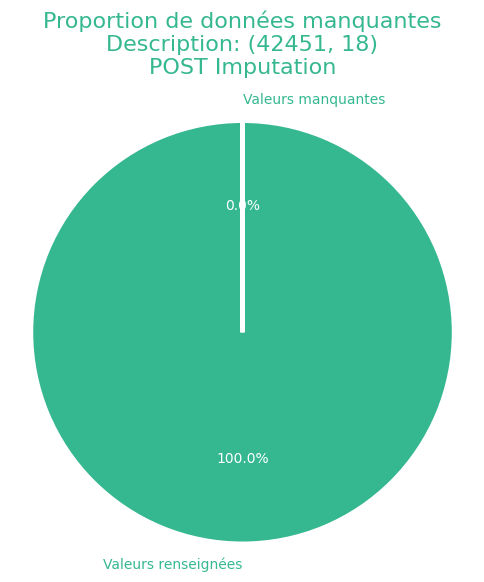

In [85]:
# Calculation of the average percentage of missing values
missing_percentage = df_food_knn_pnns.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Valeurs renseignées", "Valeurs manquantes"]
# Define color code
colors = ["#35B890",'#FFA51F']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de données manquantes\nDescription: {df_food_knn_pnns.shape}\nPOST Imputation",pad=20,color="#35B890",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#35B890", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

Maintenant que tous les produits ont un Nutri-Grade, la colonne du nutri-score peut-être supprimé. 

In [86]:
df_food_knn_pnns = df_food_knn_pnns.drop(columns=["nutrition-score-fr_100g"])

## **4. Conclusion**
---

Malgré la quantité importante de données manquantes dans le jeu de données, il a été possible d'extraire **42 451 produits français correctement renseignés**. Une imputation de valeurs a été nécessaire pour une petite quantité de valeurs nutritionnelles. Afin de ne pas biaiser les informations, une analyse de distribution avant et après les différentes méthodes d'imputations montre que **les données n'ont pas une distribution dite normale**. Ainsi, **la méthode des KNN-imputer** est celle qui impacte le moins l'information et donc la distribution des données. C'est cette méthode qui a servit pour compléter les dernières valeurs. 

In [87]:
# Overview of final data
df_food_knn_pnns.sample(1)

,code,product_name,brands,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
206963,3250391552443,Sticks & Bretzels d'Alsace,Netto,1,1,0,D,Salty snacks,Appetizers,1624.0,2.9,0.3,76.1,2.2,5.52,11.3,2.99


In [88]:
# Dataset description
df_food_knn_pnns.shape

(42451, 17)

In [89]:
# Dataset description
df_food_knn_pnns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42451 entries, 226 to 320763
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         42451 non-null  object 
 1   product_name                 42451 non-null  object 
 2   brands                       42362 non-null  object 
 3   allergens                    42451 non-null  int32  
 4   additives_fr                 42451 non-null  int32  
 5   ingredients_from_palm_oil_n  42451 non-null  int32  
 6   nutrition_grade_fr           42451 non-null  object 
 7   pnns_groups_1                42451 non-null  object 
 8   pnns_groups_2                42451 non-null  object 
 9   energy_100g                  42451 non-null  float64
 10  fat_100g                     42451 non-null  float64
 11  saturated-fat_100g           42451 non-null  float64
 12  carbohydrates_100g           42451 non-null  float64
 13  sugars_100g       

In [90]:
# Exportation
df_food_knn_pnns.to_csv("C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact_final.csv", index=False)